# The Datatset & The Classifier #

In [16]:
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from src.data import Data
from src.classifier import fit_clf, evaluate
from src.features import get_features, features_per_samples, weight_summary
from IPython.display import display

%load_ext autoreload
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Main Directories

In [4]:
TOP_DIR = './data/'
DATA_DIR = TOP_DIR + 'dataset/'
MODEL_DIR = TOP_DIR + 'models/'

## 1. Loading Data

In [5]:
# Load the data
n_features = 10000
data = Data(n_features=n_features)
# data = Data(n_features=10000, read_shelf=False)
X = data.get_X()
X_malware = data.get_X_malware()
X_goodware= data.get_X_goodware()
Y = data.get_Y()
feature_names = data.get_feature_names()

print(f'X.shape: {X.shape} | Y.shape: {Y.shape}')
print(f'X_malware.shape: {X_malware.shape}')
print(f'X_goodware.shape: {X_goodware.shape}')
print(f'Number of features: {len(feature_names)}')


Starting to read the data shelf
Finished reading the data shelf. Elapsed time: 0.0019869883333332914 minutes
X.shape: (129728, 10000) | Y.shape: (129728,)
X_malware.shape: (12735, 10000)
X_goodware.shape: (116993, 10000)
Number of features: 10000


## 2. Training & Evaluating the Classifier

### **2.1. Stratified split**

In [6]:
MAL_LABEL = 1
GOOD_LABEL = 0

# Split data
X_train, X_test, Y_train, Y_test = data.split(test_size=0.3, random_state=0)

# Adjust Class Labels [Goodware is 0 or -1]
Y_train[Y_train == 0] = GOOD_LABEL
Y_test[Y_test == 0] = GOOD_LABEL
Y_train[Y_train == 1] = MAL_LABEL
Y_train[Y_train == 1] = MAL_LABEL

# Malware & its split subsets
X_malware = data.get_X_malware()
X_mal_train = data.get_X_mal_train()
X_mal_test = data.get_X_mal_test()

# Goodware & its split subsets
X_goodware = data.get_X_goodware()
X_good_train = data.get_X_good_train()
X_good_test = data.get_X_good_test()

print("Stratified Split Complete")

Stratified Split Complete


### **2.2. Train the classifier**

In [7]:
%autoreload
# Fit a classifier
model = fit_clf(X_train, Y_train, C=1.0, weight={1:2, 0:1}, linearsvc=True,
         fname=f'c_1_top_{n_features}_test_0.3_weight_2_linearsvc')

Model c_1_top_10000_test_0.3_weight_2_linearsvc Loaded


**Model Parameters**

In [9]:
# Get model parameters (either LinearSVC or SVC)
C = model.C
if type(model)==LinearSVC:
    weights = model.coef_.flatten()
elif type(model)==SVC:
    weights = model.coef_.toarray().flatten()

intercept = model.intercept_[0]

print("C =", C)
print("Weights =", np.round(weights,4))
print(f"Non-zero Weights % = "
      f"{100*np.nonzero(weights)[0].shape[0]/weights.shape[0]:.2f}%")
print("Intercept =", intercept)

C = 1.0
Weights = [-0.      0.4176  0.1756 ...  0.      0.      0.    ]
Non-zero Weights % = 77.28%
Intercept = -1.308508950646257


### **2.3. Evaluate the classifier**

Model Evaluation on the Test Set:

Accuracy: 0.9818

Classification Report:
               precision    recall  f1-score   support

     Malware       0.91      0.90      0.91      3821
    Goodware       0.99      0.99      0.99     35098

    accuracy                           0.98     38919
   macro avg       0.95      0.95      0.95     38919
weighted avg       0.98      0.98      0.98     38919

Confusion matrix without Normalisation:
[('TP', 3451), ('FN', 370), ('FP', 340), ('TN', 34758)]

Confusion matrix with Normalisation:
[('TP', 0.9032), ('FN', 0.0968), ('FP', 0.0097), ('TN', 0.9903)]



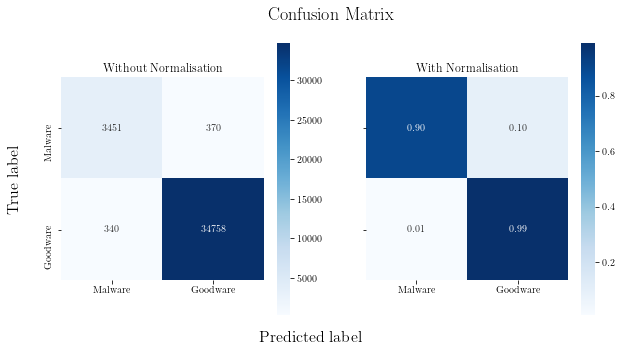

In [10]:
print("Model Evaluation on the Test Set:\n"
      "=================================\n")

Y_true_test = Y_test
Y_pred_test = model.predict(X_test)

evaluate(Y_true_test, Y_pred_test, subset='test', cmap='Blues')

Model Evaluation on the Training Set:

Accuracy: 0.9883

Classification Report:
               precision    recall  f1-score   support

     Malware       0.94      0.94      0.94      8914
    Goodware       0.99      0.99      0.99     81895

    accuracy                           0.99     90809
   macro avg       0.97      0.97      0.97     90809
weighted avg       0.99      0.99      0.99     90809

Confusion matrix without Normalisation:
[('TP', 8385), ('FN', 529), ('FP', 536), ('TN', 81359)]

Confusion matrix with Normalisation:
[('TP', 0.9407), ('FN', 0.0593), ('FP', 0.0065), ('TN', 0.9935)]



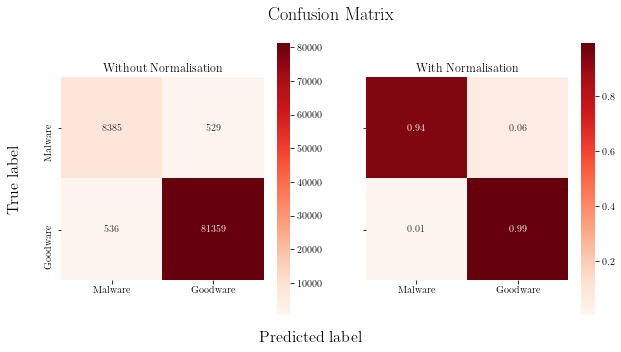

In [11]:
print("Model Evaluation on the Training Set:\n"
      "=====================================\n")

Y_true_train = Y_train
Y_pred_train = model.predict(X_train)

evaluate(Y_true_train, Y_pred_train, subset='train', cmap='Reds')

## 3. Feature Analysis

### **3.1. Sample Density (Features per sample)**

In [12]:
%autoreload
# 0. Sparsity
display("Features per sample for the whole dataset")
display(features_per_samples(X))
display("Features per sample for the malware samples")
display(features_per_samples(X_malware))
display("Features per sample for the goodware samples")
display(features_per_samples(X_goodware))


'Features per sample for the whole dataset'

,0
count,129728.000000
mean,61.057505
std,42.657288
min,0.000000
25%,32.000000
50%,52.000000
75%,80.000000
max,773.000000


'Features per sample for the malware samples'

,0
count,12735.000000
mean,72.623871
std,56.569921
min,2.000000
25%,35.000000
50%,54.000000
75%,93.000000
max,773.000000


'Features per sample for the goodware samples'

,0
count,116993.000000
mean,59.798475
std,40.660179
min,0.000000
25%,31.000000
50%,52.000000
75%,79.000000
max,393.000000


### **3.2. Basic Feature Statistics**

In [15]:
# 1. Construct a features dataframe
%autoreload

features = get_features(feature_names, weights, X, X_malware, X_goodware, Y)

print('1. Dataframe of all features\n')
print(f'Columns:\n--------\n'
      f'0 {"idx":<10} => Index\n'
      f'1 {"feature":<10} => Feature name\n'
      f'2 {"weight":<10} => Feature weight in the trained model\n'
      f'3 {"all_count":<10} => The frequency count of the feature in the whole dataset\n'
      f'4 {"all_freq":<10} => P(x|D) The normalised frequency of the feature in the whole dataset\n'
      f'5 {"mal_count":<10} => The frequency count of the feature in the malware class\n'
      f'6 {"mal_freq":<10} => P(x|malware) The normalised frequency of the feature in the malware class\n'
      f'7 {"good_count":<10} => The frequency count of the feature in the goodware dataset\n'
      f'8 {"good_freq":<10} => P(x|goodware) The normalised frequency of the feature in the goodware class\n'
      f'9 {"chi2":<10} => The chi^2 value to measure the independence between features and classes (for feature selection)\n')

display(features)


1. Dataframe of all features

Columns:
--------
0 idx        => Index
1 feature    => Feature name
2 weight     => Feature weight in the trained model
3 all_count  => The frequency count of the feature in the whole dataset
4 all_freq   => P(x|D) The normalised frequency of the feature in the whole dataset
5 mal_count  => The frequency count of the feature in the malware class
6 mal_freq   => P(x|malware) The normalised frequency of the feature in the malware class
7 good_count => The frequency count of the feature in the goodware dataset
8 good_freq  => P(x|goodware) The normalised frequency of the feature in the goodware class
9 chi2       => The chi^2 value to measure the independence between features and classes (for feature selection)



,feature,weight,all_count,all_freq,mal_count,mal_freq,good_count,good_freq,chi2,pval
0,activities::5+Debug,-6.071532e-18,4,0.000031,4,0.000314,0,0.000000,36.746918,1.345031e-09
1,activities:::emulator,4.176132e-01,99,0.000763,88,0.006910,11,0.000094,699.183882,4.499607e-154
2,activities:::paperVideo,1.755853e-01,7,0.000054,6,0.000471,1,0.000009,45.547302,1.489968e-11
3,activities:::pushservice,-2.577943e-01,328,0.002528,291,0.022850,37,0.000316,2306.574570,0.000000e+00
4,activities:::reader,1.755853e-01,7,0.000054,6,0.000471,1,0.000009,45.547302,1.489968e-11
...,...,...,...,...,...,...,...,...,...,...
9995,urls::https://wx-credit-repay_tenpay_com/v2/hy...,0.000000e+00,4,0.000031,4,0.000314,0,0.000000,36.746918,1.345031e-09
9996,urls::https://wzrkt_com/a1?os=Android&t=,-4.336809e-18,196,0.001511,161,0.012642,35,0.000299,1158.125304,7.690839e-254
9997,urls::https://yintong_com_cn,2.949030e-17,4,0.000031,4,0.000314,0,0.000000,36.746918,1.345031e-09
9998,urls::https://yintong_com_cn/llpayh5/bank_list...,2.949030e-17,4,0.000031,4,0.000314,0,0.000000,36.746918,1.345031e-09


In [17]:
# 2. Rank features by chi2, for feature selection
features_by_chi2 = features.sort_values(by='chi2', ascending=False)
top = 100
print(f'2. Features ranked by chi^2 (top {top})\n')
print('[Note the difference between the two distributions: mal_freq=P(x|M) vs good_freq=P(x|G)]\n')
display(features_by_chi2.head(top))

2. Features ranked by chi^2 (top 100)

[Note the difference between the two distributions: mal_freq=P(x|M) vs good_freq=P(x|G)]



,feature,weight,all_count,all_freq,mal_count,mal_freq,good_count,good_freq,chi2,pval
2610,intents::android_intent_action_USER_PRESENT,1.196050,11341,0.087421,6309,0.495406,5032,0.043011,26887.073231,0.0
2448,app_permissions::name='android_permission_SYST...,0.477371,14910,0.114933,7171,0.563094,7739,0.066149,24677.269176,0.0
2592,intents::android_intent_action_PACKAGE_ADDED,0.615389,9473,0.073022,5029,0.394896,4444,0.037985,20035.058466,0.0
2480,app_permissions::name='com_android_launcher_pe...,0.452624,9023,0.069553,4677,0.367256,4346,0.037148,17993.686961,0.0
2412,app_permissions::name='android_permission_GET_...,0.193133,19368,0.149297,7342,0.576521,12026,0.102792,17263.698875,0.0
2594,intents::android_intent_action_PACKAGE_REMOVED,-0.087971,6673,0.051438,3334,0.261798,3339,0.028540,12148.170813,0.0
8795,urls::https://android_revmob_com,2.165472,1522,0.011732,1404,0.110247,118,0.001009,11681.471626,0.0
6966,urls::http://revmob_com_,1.567559,1570,0.012102,1425,0.111896,145,0.001239,11620.281012,0.0
2420,app_permissions::name='android_permission_MOUN...,0.102174,8437,0.065036,3470,0.272477,4967,0.042456,9343.489971,0.0
9695,urls::https://s3_amazonaws_com/www_revmob_com/...,0.161691,981,0.007562,927,0.072792,54,0.000462,7945.590700,0.0


In [18]:
# 3.1 Features with non-zero weights
nz_features = features.loc[features.weight != 0]
print(f'\n3.1 Features with non-zero weights '
      f'({nz_features.shape[0]}/{features.shape[0]} = '
      f'{nz_features.shape[0]/features.shape[0]*100:.2f}%)\n')

print('[Only these features contribute to the output of the decision function]\n')

display(nz_features)


3.1 Features with non-zero weights (7728/10000 = 77.28%)

[Only these features contribute to the output of the decision function]



,feature,weight,all_count,all_freq,mal_count,mal_freq,good_count,good_freq,chi2,pval
0,activities::5+Debug,-6.071532e-18,4,0.000031,4,0.000314,0,0.000000,36.746918,1.345031e-09
1,activities:::emulator,4.176132e-01,99,0.000763,88,0.006910,11,0.000094,699.183882,4.499607e-154
2,activities:::paperVideo,1.755853e-01,7,0.000054,6,0.000471,1,0.000009,45.547302,1.489968e-11
3,activities:::pushservice,-2.577943e-01,328,0.002528,291,0.022850,37,0.000316,2306.574570,0.000000e+00
4,activities:::reader,1.755853e-01,7,0.000054,6,0.000471,1,0.000009,45.547302,1.489968e-11
...,...,...,...,...,...,...,...,...,...,...
9994,urls::https://www_zeetequila_com/products,-2.417771e-17,778,0.005997,0,0.000000,778,0.006650,84.687374,3.494750e-20
9996,urls::https://wzrkt_com/a1?os=Android&t=,-4.336809e-18,196,0.001511,161,0.012642,35,0.000299,1158.125304,7.690839e-254
9997,urls::https://yintong_com_cn,2.949030e-17,4,0.000031,4,0.000314,0,0.000000,36.746918,1.345031e-09
9998,urls::https://yintong_com_cn/llpayh5/bank_list...,2.949030e-17,4,0.000031,4,0.000314,0,0.000000,36.746918,1.345031e-09


3.2 Weight Statistics & Density



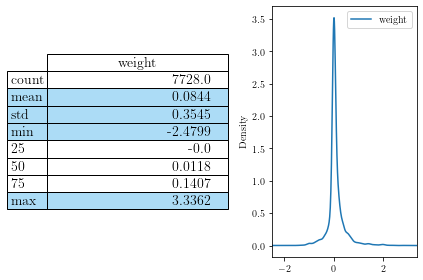

In [17]:
%autoreload
# 3.2 Weight distribution
print("3.2 Weight Statistics & Density\n")
weight_summary(nz_features)

In [18]:
# 3.3 Rank non-zero features by the magnitude of weights (absolute values)
ranked_idx = np.argsort(abs(nz_features.weight)).values[::-1]
abs_features = nz_features.iloc[ranked_idx]
top = 100
print(f'\n3.3. Top {top} features, '
      f'Ranked by weight magnitude (absolute values)\n')

print("[For a linear SVM, these weights correspond to the largest partial derivatives of the decision function]\n")

display(abs_features.head(top))


3.3. Top 100 features, Ranked by weight magnitude (absolute values)

[For a linear SVM, these weights correspond to the largest partial derivatives of the decision function]



,feature,weight,all_count,all_freq,mal_count,mal_freq,good_count,good_freq,chi2,pval
2228,activities::vn_adflex_ads_AdsActivity,3.336234,15,0.000116,15,0.001178,0,0.000000,137.800942,8.056069e-32
1257,activities::com_phonegap_plugins_videoplayer_S...,3.222966,4,0.000031,4,0.000314,0,0.000000,36.746918,1.345031e-09
9163,urls::https://collector_mobile_cnzz_com,3.107376,36,0.000278,36,0.002827,0,0.000000,330.722261,6.690805e-74
2534,app_permissions::name='com_xiaomi_sdk_permissi...,2.868803,54,0.000416,53,0.004162,1,0.000009,475.919111,1.650988e-105
2502,app_permissions::name='com_legion2app_biznes_s...,2.796274,8,0.000062,8,0.000628,0,0.000000,73.493836,1.009509e-17
...,...,...,...,...,...,...,...,...,...,...
9918,urls::https://www_growingio_com/mobile/realtime,1.438833,8,0.000062,6,0.000471,2,0.000017,38.394709,5.778886e-10
9917,urls::https://www_growingio_com/mobile/events/,1.438833,8,0.000062,6,0.000471,2,0.000017,38.394709,5.778886e-10
7077,urls::http://schemas_android_com/apk/res-auto,1.432380,1273,0.009813,635,0.049863,638,0.005453,2308.222169,0.000000e+00
6640,urls::http://os_scmpacdn_com/files/mobile/0_9_...,1.432336,1543,0.011894,443,0.034786,1100,0.009402,622.163449,2.530558e-137


In [21]:
# 3.4 Rank features with positive weights
pos_features = nz_features.loc[nz_features.weight > 0]
pos_features = pos_features.sort_values(by='weight', ascending=False)
top = 100
print(f'\n3.4. Top {top} positive features (out of {pos_features.shape[0]}), '
      f'Ranked by weight\n')

print("[These weights correspond to the largest partial derivatives towards the positive malware class]\n")

display(pos_features.head(top))


3.4. Top 100 positive features (out of 5278), Ranked by weight

[These weights correspond to the largest partial derivatives towards the positive malware class]



,feature,weight,all_count,all_freq,mal_count,mal_freq,good_count,good_freq,chi2,pval
2228,activities::vn_adflex_ads_AdsActivity,3.336234,15,0.000116,15,0.001178,0,0.000000,137.800942,8.056069e-32
1257,activities::com_phonegap_plugins_videoplayer_S...,3.222966,4,0.000031,4,0.000314,0,0.000000,36.746918,1.345031e-09
9163,urls::https://collector_mobile_cnzz_com,3.107376,36,0.000278,36,0.002827,0,0.000000,330.722261,6.690805e-74
2534,app_permissions::name='com_xiaomi_sdk_permissi...,2.868803,54,0.000416,53,0.004162,1,0.000009,475.919111,1.650988e-105
2502,app_permissions::name='com_legion2app_biznes_s...,2.796274,8,0.000062,8,0.000628,0,0.000000,73.493836,1.009509e-17
3701,urls::http://ads_yemonisoni_com/?package=,2.728391,809,0.006236,248,0.019474,561,0.004795,396.814376,2.719016e-88
8790,urls::https://android_bcfads_com,2.677394,21,0.000162,20,0.001570,1,0.000009,173.085745,1.567630e-39
46,activities::_Act_Home,2.448210,4,0.000031,4,0.000314,0,0.000000,36.746918,1.345031e-09
502,activities::com_apperhand_device_android_EULAA...,2.429307,46,0.000355,21,0.001649,25,0.000214,66.725666,3.120458e-16
4062,urls::http://api_jiagu_360_cn/s_html,2.355912,29,0.000224,28,0.002199,1,0.000009,246.431199,1.557731e-55


In [22]:
# 3.5 Rank features with negative weights
neg_features = nz_features.loc[nz_features.weight < 0]
neg_features = neg_features.sort_values(by='weight', ascending=True)
top = 100
print(f'\n3.5. Top {top} negative features (out of {neg_features.shape[0]}), '
      f'Ranked by weight\n')

print("[These weights correspond to the largest partial derivatives towards the negative goodware class]\n")

display(neg_features.head(top))



3.5. Top 100 negative features (out of 2450), Ranked by weight

[These weights correspond to the largest partial derivatives towards the negative goodware class]



,feature,weight,all_count,all_freq,mal_count,mal_freq,good_count,good_freq,chi2,pval
6831,urls::http://portre_yemonisoni_com/mcla,-2.479864,560,0.004317,14,0.001099,546,0.004667,33.863072,5.913045e-09
8448,urls::http://www_startappexchange_com/1_3/trac...,-2.104124,655,0.005049,372,0.029211,283,0.002419,1632.766831,0.000000e+00
1328,activities::com_revmob_FullscreenActivity,-1.773855,88,0.000678,42,0.003298,46,0.000393,142.860489,6.305715e-33
6828,urls::http://pms_mb_qq_com/rsp204,-1.665209,30,0.000231,13,0.001021,17,0.000145,38.067190,6.834986e-10
3658,urls::http://admin_appnext_com/,-1.613778,164,0.001264,76,0.005968,88,0.000752,247.131125,1.096212e-55
8236,urls::http://www_google-analytics_com/collect,-1.572327,38299,0.295225,2069,0.162466,36230,0.309677,843.047271,2.361085e-185
3694,urls::http://ads_mobilecore_com/?package=,-1.449543,1504,0.011593,251,0.019709,1253,0.010710,80.230592,3.331689e-19
2806,interesting_calls::Cipher(Lorg/chromium/base/O...,-1.410605,446,0.003438,4,0.000314,442,0.003778,40.082691,2.434365e-10
5683,urls::http://i_ytimg_com/vi/,-1.401114,2130,0.016419,670,0.052611,1460,0.012479,1126.550803,5.601204e-247
9744,urls::https://sites_google_com/site/gamegripper,-1.327685,53,0.000409,48,0.003769,5,0.000043,390.357473,6.919188e-87


## End ⏹